# Example of Transfer learning with Tensorflow hub:

Import Libraries:

In [1]:
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
import matplotlib.pyplot as plt

Model load:

In [2]:
classifier_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url,input_shape = IMAGE_SHAPE+(3,))
])

Labels load:

In [3]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())
imagenet_labels

array(['background', 'tench', 'goldfish', ..., 'bolete', 'ear',
       'toilet tissue'], dtype='<U30')

Load picture to predict:

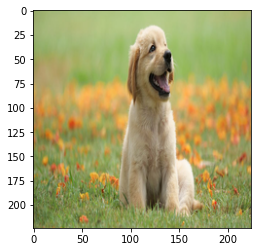

In [4]:
from six.moves import urllib
import matplotlib.image as mpimg
from PIL import Image

urllib.request.urlretrieve("https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/dog-puppy-on-garden-royalty-free-image-1586966191.jpg?crop=1.00xw:0.669xh;0,0.190xh&resize=1200:*", "car.jpg")

img = Image.open('car.jpg')
img = img.resize(IMAGE_SHAPE,Image.ANTIALIAS)

_=plt.imshow(img)

Transform picture to model format:

In [5]:
image_array = np.array(img)
image_array = image_array/ 255.0
image_array = np.expand_dims(image_array,axis = 0)

Predict value:

In [6]:
result = classifier.predict(image_array)
result

array([[ 0.28671172, -1.729799  , -0.30522674, ..., -1.2725929 ,
        -0.4560028 ,  1.667281  ]], dtype=float32)

In [7]:
predicted_class = np.argmax(result[0],axis = -1)
predicted_class_name = imagenet_labels[predicted_class]
print(f'Predicted: {predicted_class_name}')

Predicted: golden retriever


Show result:

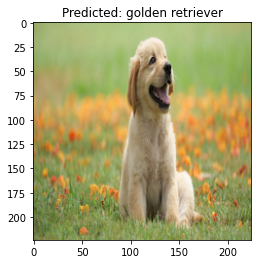

In [8]:
plt.imshow(img)
plt.title(f'Predicted: {predicted_class_name}')
_=plt.show()

Define all as a function where link where given and result is plot with prediction:

In [9]:
def predict_classes(link):   
    import numpy as np
    import tensorflow as tf
    import tensorflow_hub as hub
    from tensorflow.keras import layers
    import matplotlib.pyplot as plt
    from six.moves import urllib
    import matplotlib.image as mpimg
    from PIL import Image

    classifier_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4'

    IMAGE_SHAPE = (224,224)

    classifier = tf.keras.Sequential([
        hub.KerasLayer(classifier_url,input_shape = IMAGE_SHAPE+(3,))
    ])

    labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
    imagenet_labels = np.array(open(labels_path).read().splitlines())
    imagenet_labels



    urllib.request.urlretrieve(link, "car.jpg")

    img = Image.open('car.jpg')
    img = img.resize(IMAGE_SHAPE,Image.ANTIALIAS)

    image_array = np.array(img)
    image_array = image_array/ 255.0
    image_array = np.expand_dims(image_array,axis = 0)


    result = classifier.predict(image_array)

    predicted_class = np.argmax(result[0],axis = -1)
    predicted_class_name = imagenet_labels[predicted_class]

    plt.imshow(img)
    plt.title(f'Predicted: {predicted_class_name}')
    _=plt.show()

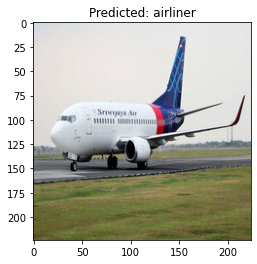

In [10]:
predict_classes('https://s.abcnews.com/images/International/indonesia-boening-plane-disappears-01-sh-llr-210109_1610202552681_hpMain_16x9_1600.jpg')